1.1

In [28]:
import sympy as sy
import math
import numpy as np
from sympy import Function
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function

In [35]:
x = sy.symbols('x')

In [47]:
expr = (sin(x) + 1) ** (sin(cos(x)))

In [52]:
expr_p = sy.diff((sin(x) + 1) ** (sin(cos(x))), x)

In [53]:
expr_p

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [57]:
f = lambdify(x, expr, 'numpy')

In [60]:
f_p = lambdify(x, expr_p, 'numpy')

In [39]:
from matplotlib import pyplot as plt

In [73]:
xvals = np.linspace(-np.pi, np.pi, 100)
fvals = f(xvals)
fpvals = f_p(xvals)

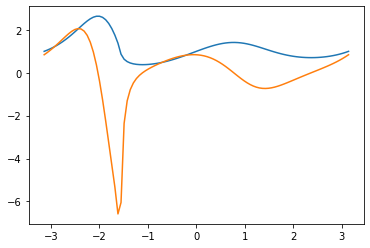

In [93]:
fig, ax = plt.subplots()
ax.plot(xvals, fvals, label='f(x)')
ax.plot(xvals, fpvals, label='f_p(x)')

1.2

In [81]:
def num_diff(f, a ,method='central', h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h)) / (2 * h)
    elif method == 'forward':
        return (f(a + h) - f(a)) / h
    elif method == 'backward':
        return (f(a) - f(a - h)) / h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [88]:
fordiff_vals = num_diff(f, xvals, 'forward')
backdiff_vals = num_diff(f, xvals, 'backward')
cendiff_vals = num_diff(f, xvals)

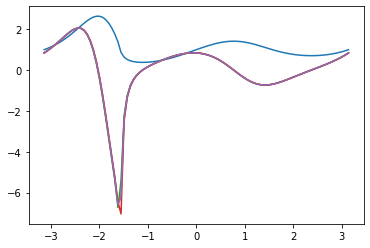

In [90]:
fig, ax = plt.subplots()
ax.plot(xvals, fvals)
ax.plot(xvals, fpvals)
ax.plot(xvals, fordiff_vals)
ax.plot(xvals, backdiff_vals)
ax.plot(xvals, cendiff_vals)

In [79]:
f(1)

1.3689877347067858

In [97]:
h_array = np.logspace(-8, 0, 9)

In [95]:
def abs_error(f, f_p, a, method, h):
    error = f_p(a) - num_diff(f, a, method, h)
    return error

In [100]:
for1_errors = abs_error(f, f_p, 1, 'forward', h_array)
back1_errors = abs_error(f, f_p, 1, 'backward', h_array)
cen1_errors = abs_error(f, f_p, 1, 'central', h_array)

(1e-13, 1)

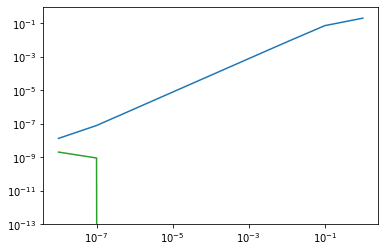

In [107]:
fig, ax = plt.subplots()
ax.plot(h_array, for1_errors)
ax.plot(h_array, back1_errors)
ax.plot(h_array, cen1_errors)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([10**(-13), 1])

1.4

In [112]:
data = np.load('plane.npy')

In [121]:
data

array([[ 7.        ,  0.01713473,  0.02057386],
       [ 8.        ,  0.96918133,  1.16186568],
       [ 9.        ,  0.95644043,  1.14476146],
       [10.        ,  0.94352499,  1.12730816],
       [11.        ,  0.93095862,  1.11037847],
       [12.        ,  0.91961398,  1.09501957],
       [13.        ,  0.90652401,  1.07721721],
       [14.        ,  0.89500484,  1.06150925]])

In [119]:
coordinates = []
for i in range(len(data)):
    data[i][1] = np.deg2rad(data[i][1])
    data[i][2] = np.deg2rad(data[i][2])
    a, b = data[i][1], data[i][2]
    x = a * tan(b) / (tan(b) - tan(a))
    y = a * tan(b) * tan(a) / (tan(b) - tan(a))
    coordinates.append((i + 7, x, y))

In [120]:
coordinates

[(7, 0.102482765512435, 0.00175618637753555),
 (8, 2.62829664465126, 3.82848822038160),
 (9, 2.68170287168866, 3.80155615669121),
 (10, 2.73716035724252, 3.77568644195503),
 (11, 2.79034431380014, 3.74899348274779),
 (12, 2.83939821082596, 3.72589372866372),
 (13, 2.89732577434663, 3.70041394894833),
 (14, 2.94921295642467, 3.67858726628955)]

In [126]:
speed = []
for i in range(len(coordinates)):
    if i == 0:
        x_p = (coordinates[i + 1][1] - coordinates[i][1]) / 1
        y_p = (coordinates[i + 1][2] - coordinates[i][2]) / 1
    elif i == len(coordinates) - 1:
        x_p = (coordinates[i][1] - coordinates[i - 1][1]) / 1
        y_p = (coordinates[i][2] - coordinates[i - 1][2]) / 1
    else:
        x_p = (coordinates[i + 1][1] - coordinates[i - 1][1]) / 2
        y_p = (coordinates[i + 1][2] - coordinates[i - 1][2]) / 2
    velocity = sqrt(x_p ** 2 + y_p ** 2)
    speed.append((i + 7, velocity))

In [127]:
speed

[(7, 4.58515144920244),
 (8, 2.29623910833016),
 (9, 0.0604965613158305),
 (10, 0.0603444231809024),
 (11, 0.0568592406787603),
 (12, 0.0587473488866402),
 (13, 0.0597854073609680),
 (14, 0.0562910626999208)]

1.5

In [128]:
from sympy.matrices import *

In [129]:
def num_jacobian(f, x0, n, m, h):
    approx = []
    for i in range(m):
        for j in range(n):
            diff = (f[i](x0[n] + h) - f[i](x0[n] - h)) / 2
    approx.append(diff)
    result = Matrix(m, n, approx)
    return result

1.7

In [159]:
import timeit
import random

In [139]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

In [145]:
g = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))

In [147]:
dg = grad(g)

In [160]:
result = compare_methods()

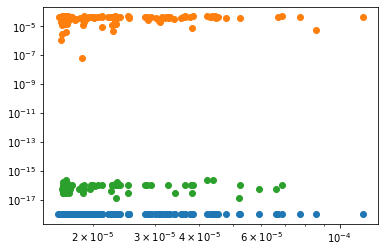

In [166]:
fig, ax = plt.subplots()
ax.plot(result[0], result[1], 'o')
ax.plot(result[2], result[3], 'o')
ax.plot(result[4], result[5], 'o')
ax.set_yscale('log')
ax.set_xscale('log')